<a href="https://colab.research.google.com/github/hattamhmmd/3333210039_TugasMiniProject_Hatta/blob/main/3333210039_Muhammad_Hatta_Ilham_Kelas_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


Crime Dataset. Dataset ini adalah dataset tentang crime dataset. Dataset ini dapat di download pada link berikut 
https://www.kaggle.com/datasets/adoumtaiga/crime-data-set

**1.1 Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Pertama-tama import library yang akan digunakan

**1.2 Importing Dataset**

In [ ]:
!gdown 1et3fg3lsezTEE0HnZrdN0STil-34VYlC

Downloading...
From: https://drive.google.com/uc?id=1et3fg3lsezTEE0HnZrdN0STil-34VYlC
To: /content/Crime_Data.csv
100% 49.3M/49.3M [00:00<00:00, 182MB/s]


Setelah itu import dataset yang sudah di upload di google drive dengan cara menyalin link google drive file tersebut.

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/Crime_Data.csv')
dataset

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20080000465209,12/13/1908,2114.0,12/13/2008,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
1,20100000202011,06/15/1964,0.0,06/15/2010,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE
2,2012000023437,01/01/1973,0.0,01/25/2012,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE
3,20130000327785,06/01/1974,0.0,09/09/2013,1117.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
4,20160000289384,01/01/1975,0.0,08/11/2016,1054.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...
481371,20180000905946,07/01/2018,0.0,07/01/2018,939.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
481372,20180000240319,07/01/2018,0.0,07/01/2018,1109.0,CAR PROWL,THEFT-CARPROWL,EAST,C,C3,CENTRAL AREA/SQUIRE PARK
481373,20180000905953,07/01/2018,0.0,07/01/2018,1337.0,CAR PROWL,THEFT-CARPROWL,NORTH,L,L2,NORTHGATE
481374,20070000430946,NaN,NaN,01/01/2007,NaN,RAPE,RAPE-OTHER,UNKNOWN,NaN,NaN,UNKNOWN


Tampilkan file datasetnya. Pada dataset diatas terdapat 481376 baris dan 11 kolom

## 2. Exploratory Data

In [ ]:
dataset.shape

(481376, 11)

Coding tersebut digunakan untuk menampilkan jumlah baris dan kolom yang terdapat pada dataset.

In [ ]:
dataset.columns

Index(['Report Number', 'Occurred Date', 'Occurred Time', 'Reported Date',
       'Reported Time', 'Crime Subcategory', 'Primary Offense Description',
       'Precinct', 'Sector', 'Beat', 'Neighborhood'],
      dtype='object')

Coding tersebut digunakan untuk menampilkan nama nama kolom yang terdapat pada dataset.

In [ ]:
dataset.dtypes

Report Number                    int64
Occurred Date                   object
Occurred Time                  float64
Reported Date                   object
Reported Time                  float64
Crime Subcategory               object
Primary Offense Description     object
Precinct                        object
Sector                          object
Beat                            object
Neighborhood                    object
dtype: object

Coding tersebut digunakan untuk menjelaskan jenis data kolom yang terdapat pada dataset. 


1. Int64 merupakan data numerical
2. Object merupakan data categorical
3. Float64 merupakan data numerical decimal







In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481376 entries, 0 to 481375
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Report Number                481376 non-null  int64  
 1   Occurred Date                481374 non-null  object 
 2   Occurred Time                481374 non-null  float64
 3   Reported Date                481376 non-null  object 
 4   Reported Time                481374 non-null  float64
 5   Crime Subcategory            481114 non-null  object 
 6   Primary Offense Description  481376 non-null  object 
 7   Precinct                     481370 non-null  object 
 8   Sector                       478367 non-null  object 
 9   Beat                         478414 non-null  object 
 10  Neighborhood                 481376 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 40.4+ MB


Coding diatas digunakan untuk menampilkan jumlah data pada masing-masing kolom.

Jika terdapat perbedaan jumlah data, itu menandakan terdapat "*Missing Value*"

In [ ]:
dataset.nunique()

Report Number                  481376
Occurred Date                    4310
Occurred Time                    1440
Reported Date                    3989
Reported Time                    1440
Crime Subcategory                  30
Primary Offense Description       144
Precinct                            6
Sector                             23
Beat                               64
Neighborhood                       59
dtype: int64

Coding Nunique diatas digunakan untuk menampilkan jumlah data nilai unik

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [ ]:
dataset.isnull().sum()

Report Number                     0
Occurred Date                     2
Occurred Time                     2
Reported Date                     0
Reported Time                     2
Crime Subcategory               262
Primary Offense Description       0
Precinct                          6
Sector                         3009
Beat                           2962
Neighborhood                      0
dtype: int64

Coding tersebut digunakan untuk mengetahui jenis kolom yang terdapat "*Missing Value*". Dari hasil diatas diketahui bahwa kolom yang terdapat 7 kolom yang terdapat "*Missing Value*", yaitu Occurrated Date, Occurrated Time, Reported Time, Crime Subcategory, Precinct, Sector, dan Beat.

In [ ]:
dataset['Occurred Date'].dtypes

dtype('O')

In [ ]:
dataset['Occurred Time'].dtypes

dtype('float64')

In [ ]:
dataset['Reported Time'].dtypes

dtype('float64')

In [ ]:
dataset['Crime Subcategory'].dtypes

dtype('O')

In [ ]:
dataset['Precinct'].dtypes

dtype('O')

In [ ]:
dataset['Sector'].dtypes

dtype('O')

In [ ]:
dataset['Beat'].dtypes

dtype('O')

Kolom yang memiliki "Missing Value" di cek type datanya. Diketahui bahwa kolom yang bertipe data object yaitu : Occurred Time, Crime Subcategory, Sector, Beat, dan Precinct. Sedangkan kolom yang bertipe data float64 yaitu : Occurred Time dan Reported Time.

Perform imputer to handle missing value in numerical data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

Simple Imputer digunakan untuk menggantikan "Missing Values" menggunakan statistika deskriptive, dan disini saya menggunakan mean.

In [ ]:
imputer = imputer.fit(dataset[['Occurred Time', 'Reported Time']])
imputer

SimpleImputer()

Kita gunakan Imputer berdasarkan kolom "Missing Value" yang termasuk data numerical, yaitu Occurred Time dan Reported Time. Data numerical dipilih supaya bisa diganti dengan data yang lain.

In [ ]:
dataset[['Occurred Time', 'Reported Time']] = imputer.transform(dataset[['Occurred Time', 'Reported Time']])
dataset.isnull().sum()

Report Number                     0
Occurred Date                     2
Occurred Time                     0
Reported Date                     0
Reported Time                     0
Crime Subcategory               262
Primary Offense Description       0
Precinct                          6
Sector                         3009
Beat                           2962
Neighborhood                      0
dtype: int64

Using drop column tohandle missing value on categorical or object data

Setelah melakukan transform imputer, maka data-data numerical tadi sudah tidak terdapat "Missing Value" kecuali kolom Crime Subcategory, Precinct, Sector, dan Beat. Karena keempat kolom tersebut merupakan type data categorical.

In [ ]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Report Number                  0
Occurred Time                  0
Reported Date                  0
Reported Time                  0
Primary Offense Description    0
Neighborhood                   0
dtype: int64

Drop column digunakan untuk menghilangkan "Missing Values" yang ada pada data bertipe categorical. Setelah di running, 4 kolom yang bertipe categorical tersebut telah dihilangkan.

In [ ]:
dataset = dataset.drop('Reported Time', axis=1)
dataset

,Report Number,Occurred Time,Reported Date,Primary Offense Description,Neighborhood
0,20080000465209,2114.000000,12/13/2008,DUI-LIQUOR,CENTRAL AREA/SQUIRE PARK
1,20100000202011,0.000000,06/15/2010,CHILD-OTHER,QUEEN ANNE
2,2012000023437,0.000000,01/25/2012,SEXOFF-OTHER,NORTHGATE
3,20130000327785,0.000000,09/09/2013,SEXOFF-OTHER,UNKNOWN
4,20160000289384,0.000000,08/11/2016,SEXOFF-OTHER,UNKNOWN
...,...,...,...,...,...
481371,20180000905946,0.000000,07/01/2018,THEFT-CARPROWL,CENTRAL AREA/SQUIRE PARK
481372,20180000240319,0.000000,07/01/2018,THEFT-CARPROWL,CENTRAL AREA/SQUIRE PARK
481373,20180000905953,0.000000,07/01/2018,THEFT-CARPROWL,NORTHGATE
481374,20070000430946,1362.029547,01/01/2007,RAPE-OTHER,UNKNOWN


Coding syntax diatas digunakan untuk mengetahui jumlah baris dan kolom terbaru setelah dilakukan perbaikan.

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [ ]:
dataset.describe()

,Report Number,Occurred Time
count,4.813760e+05,481376.000000
mean,1.632547e+13,1362.029547
std,8.611175e+12,687.879745
min,2.008000e+08,0.000000
25%,2.008000e+13,900.000000
50%,2.012000e+13,1500.000000
75%,2.015000e+13,1923.000000
max,2.011000e+15,2359.000000


Coding diatas digunakan untuk mendeksripsikan masing-masing kolom dataset berdasarkan mean, standar deviasi, minimum dan maximum.

<Axes: >

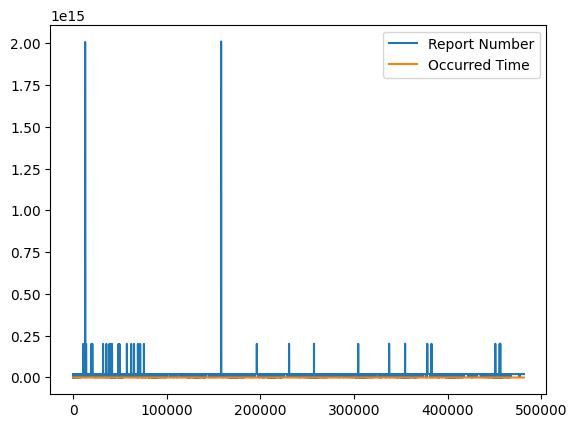

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

Coding dibawah digunakan untuk menghitung library baru yang digunakan untuk menggambarkan data dalam sebuah plot ataupun grafik.
Dari grafik diatas, terdapat kemungkinan "Outlier" pada kolom Report Number karena pada grafik diatas memiliki garis paling tinggi. Dan kolom yang lain akan di observasi lebih lanjut.

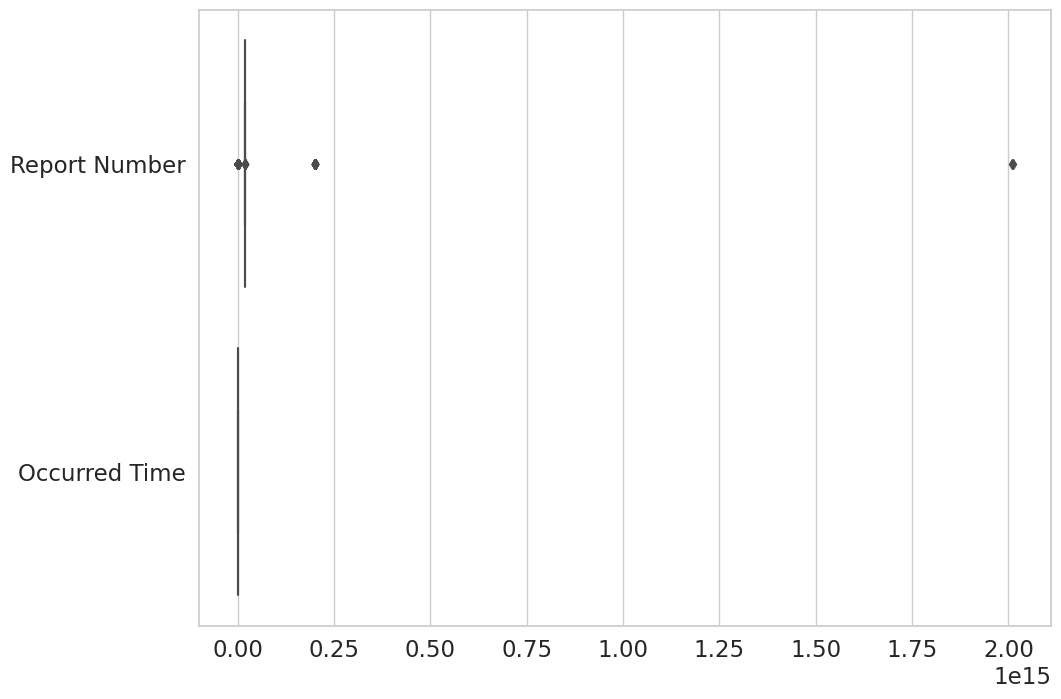

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Dari boxplot diatas ternyata dapat dipastikan bahwa kolom Report Number terdapat "Outlier" sehingga kita perlu membersihkan "Outlier"nya.

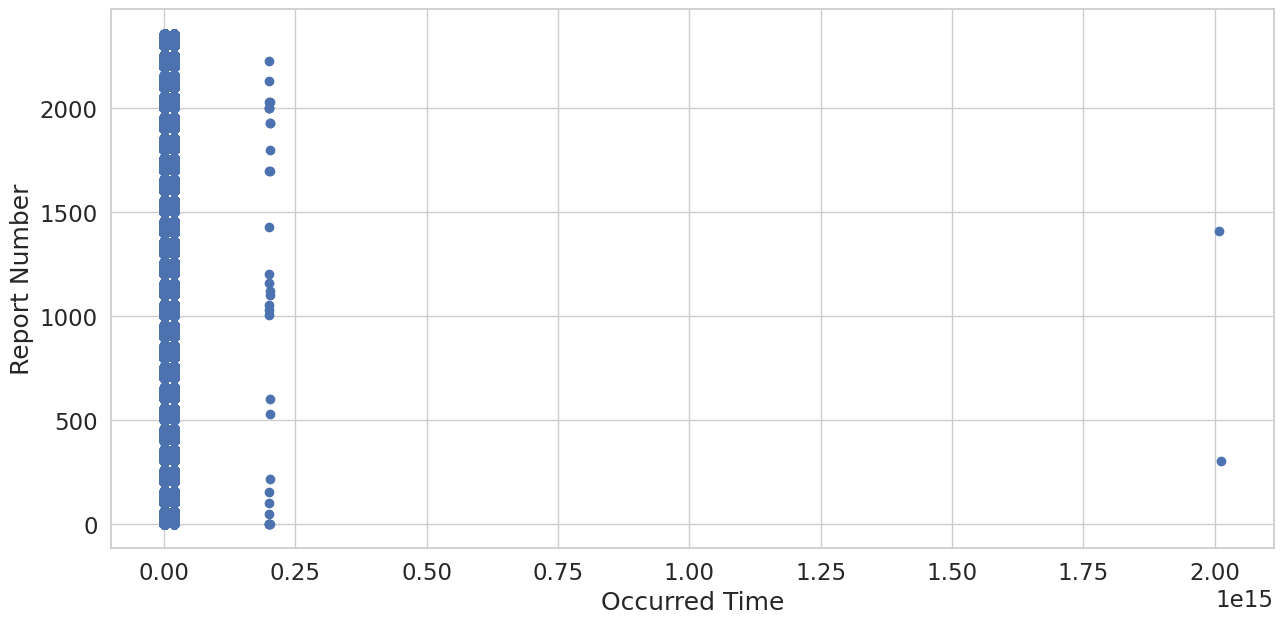

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Report Number'], dataset['Occurred Time'])
 
# x-axis label
ax.set_xlabel('Occurred Time')
 
# y-axis label
ax.set_ylabel('Report Number')
plt.show()

Setelah itu kita cari scatter plotnya menggunakan coding diatas. Dari gambar diatas dapat diketahui bahwa Report Number terdapat "Outlier" karena terdapat titik yang jauh dari pusat.

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [ ]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['Report Number'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Report Number'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (481376, 5)


Dari coding diatas kita membuat variabel Q1 dan Q3 yang berisi rumus perhitungan Quartil dari metode IQR.

Q1 memakai rumus Quartil 1 25%.

Q3 memakai rumus Quartil 3 75%.

In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Report Number'] > upper].index
outliers_lower = dataset[dataset['Report Number'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (380799, 5)


Coding diatas digunakan untuk menghapus outlier pada kolom report number, setelah dibersihkan outlier nya didapatkan jumlah baris baru sebanyak 380799 dari yang sebelumnya 481376 baris.

In [ ]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['Occurred Time'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Occurred Time'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (380799, 5)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Occurred Time'] > upper].index
outliers_lower = dataset[dataset['Occurred Time'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (380799, 5)


Coding diatas juga digunakan untuk menghapus outlier, namun dikarenakan tidak terdapat outlier pada kolom occured time maka tidak ada pembersihan baris yang dilakukan.

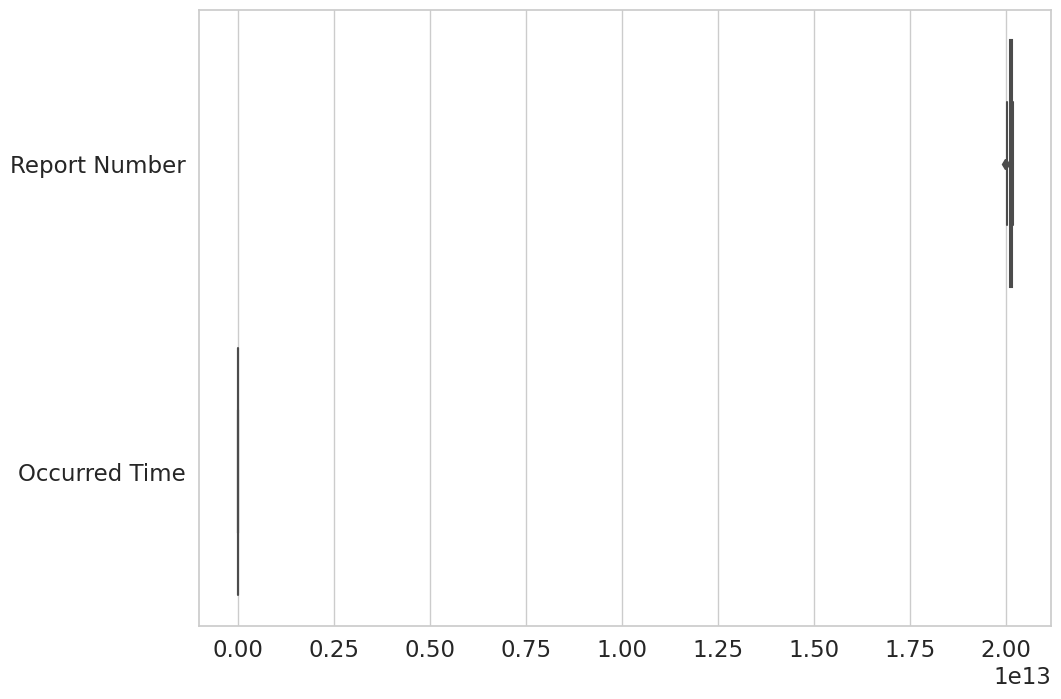

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Coding diatas digunakan untuk mengecek kembali apakah masih terdapat outlier pada dataset. Dan setelah dilakukan pengecekan kembali tidak terdapat outlier lagi.

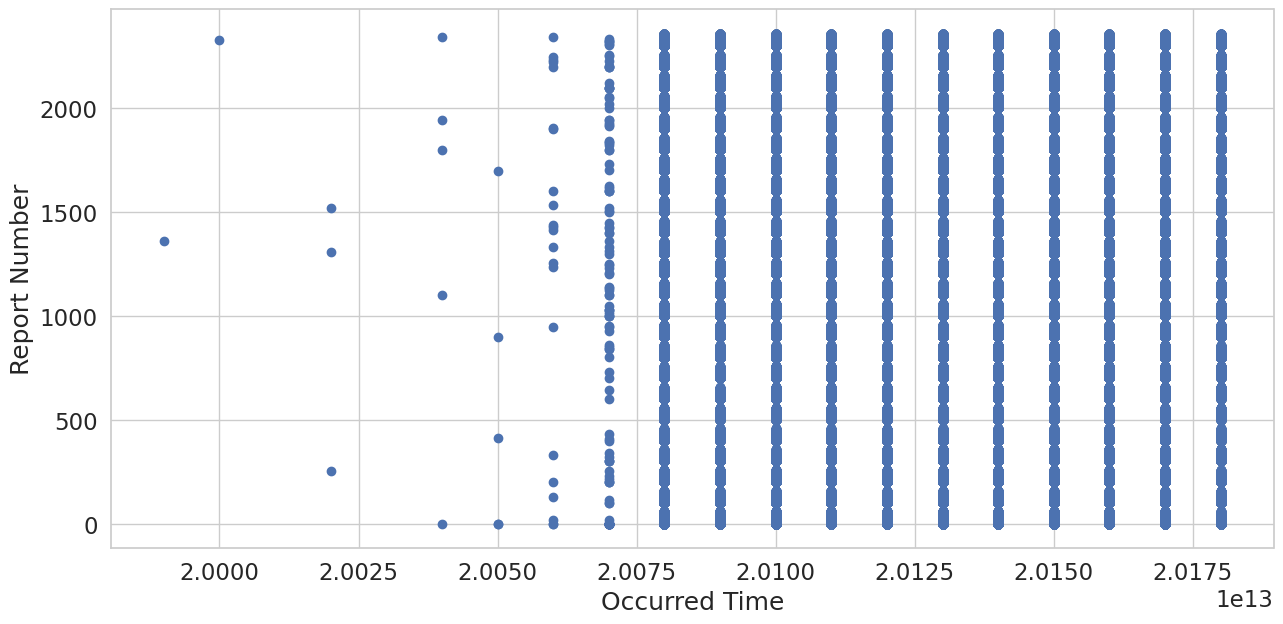

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Report Number'], dataset['Occurred Time'])
 
# x-axis label
ax.set_xlabel('Occurred Time')
 
# y-axis label
ax.set_ylabel('Report Number')
plt.show()

Coding diatas digunakan untuk menggambarkan dataset menjadi x dan y

Show data distribution based on density (kde - kernel density estimation)

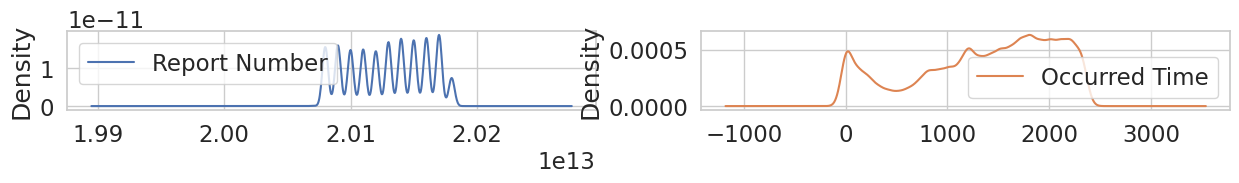

In [ ]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Grafik diatas menggambarkan bahwa data pada report number memiliki data dengan nilai yang naik turun, pada occurred time memiliki nilai kerapatan paling kecil sekitar 0,0005 dengan variansi tidak terlalu berbeda.

Show data distribution based on histogram

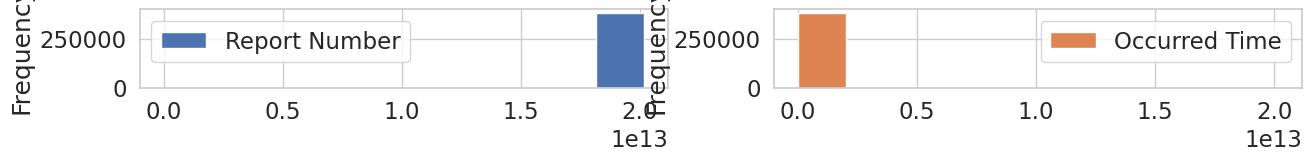

In [ ]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Codingan diatas merupakan perintah untuk membuat histogram dari data set dengan menggunakan library matplotlib pada bahasa pemrograman Python.

*   kind='hist': jenis plot yang akan digunakan adalah histogram.
*   subplots=True: membuat beberapa subplot (grafik) dalam satu gambar.
*   layout=(10,2): menentukan layout dari subplot dalam bentuk 10 baris dan 2 kolom.
*   figsize=(15,12): menentukan ukuran gambar yang akan dihasilkan dengan lebar 15 inci dan tinggi 12 inci.
*   sharex=False: memberikan sumbu x yang berbeda pada setiap subplot.

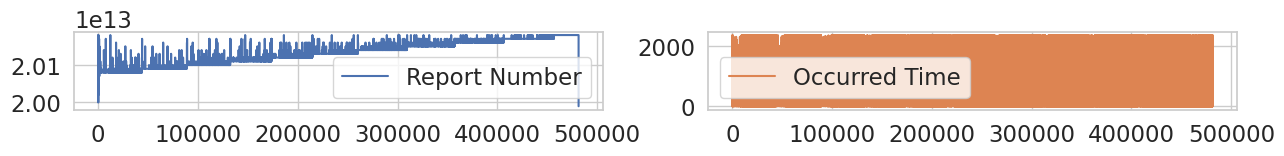

In [ ]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Codingan diatas juga sama digunakan untuk membuat histogram dari dataset.

**3.2 CORRELATION MATRIX**

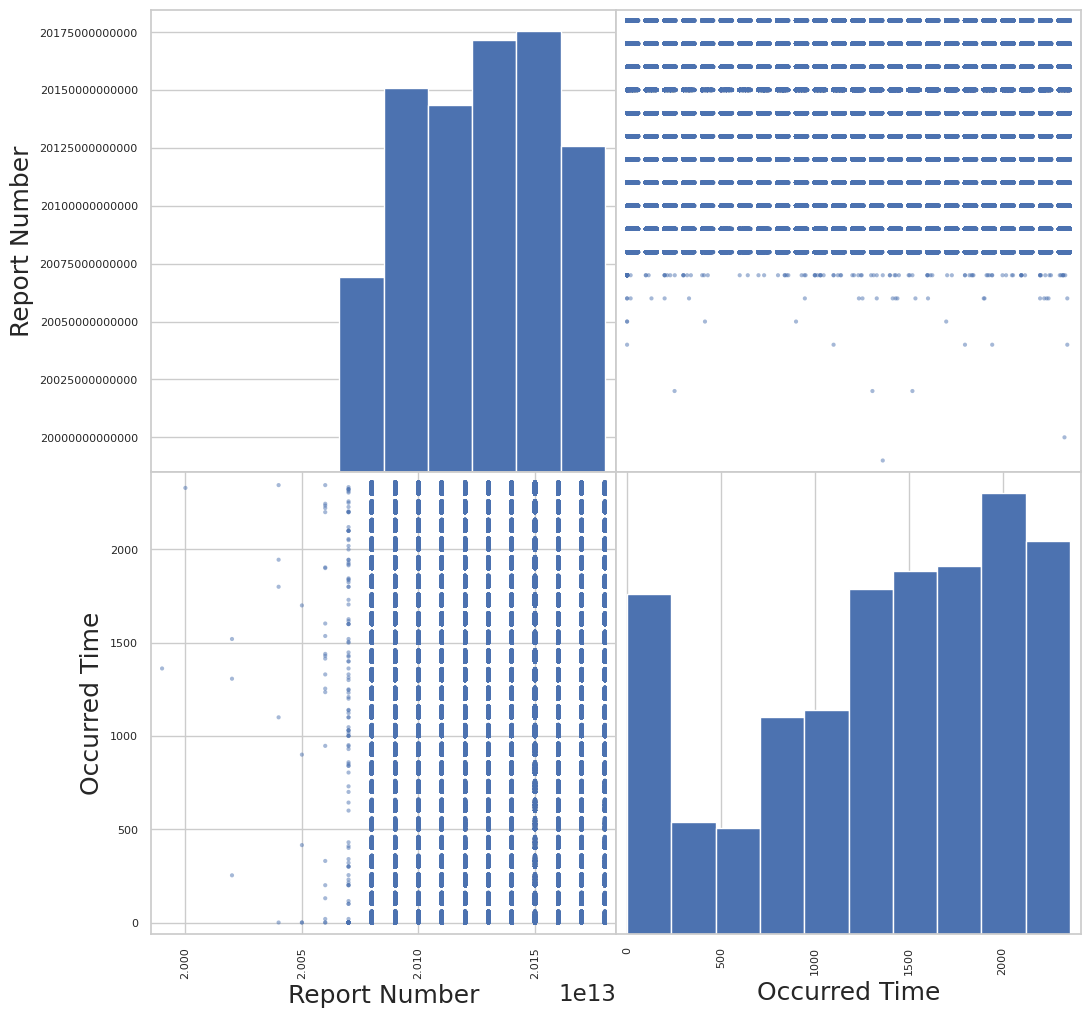

In [ ]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

Codingan tersebut merupakan perintah untuk membuat matriks plot scatter dari data set dengan menggunakan library pandas dan matplotlib pada bahasa pemrograman Python. 

Matriks plot scatter ini akan menunjukkan korelasi antara setiap pasang variabel dalam data set. Masing-masing plot scatter akan menunjukkan hubungan antara dua variabel dengan sumbu x dan y masing-masing, dan matriks plot scatter akan menunjukkan hubungan antara setiap pasang variabel dalam bentuk matriks persegi

correlation matrix with heatmap

<ipython-input-37-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


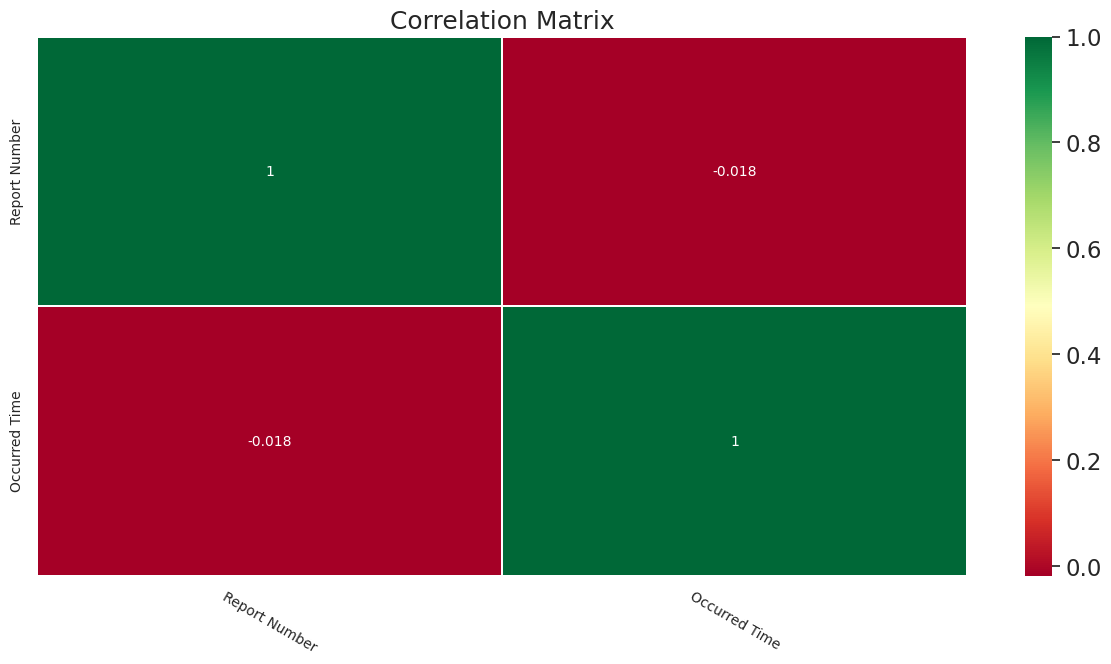

In [ ]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Codingan tersebut merupakan perintah untuk membuat matriks korelasi dan menampilkan hasilnya dalam bentuk heatmap.

Hasil dari heatmap akan menunjukkan korelasi antara setiap pasang variabel dalam data set. Setiap sel pada heatmap menunjukkan korelasi antara dua variabel dengan warna yang menunjukkan arah dan kekuatan korelasi. Semakin besar nilai korelasi, semakin kuat hubungan antara dua variabel tersebut.

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [ ]:
x = dataset.drop('Neighborhood', axis=1)
x

,Report Number,Occurred Time,Reported Date,Primary Offense Description
0,20080000465209,2114.000000,12/13/2008,DUI-LIQUOR
1,20100000202011,0.000000,06/15/2010,CHILD-OTHER
3,20130000327785,0.000000,09/09/2013,SEXOFF-OTHER
4,20160000289384,0.000000,08/11/2016,SEXOFF-OTHER
7,20170000474905,800.000000,12/27/2017,SEXOFF-INDECENT LIBERTIES
...,...,...,...,...
481371,20180000905946,0.000000,07/01/2018,THEFT-CARPROWL
481372,20180000240319,0.000000,07/01/2018,THEFT-CARPROWL
481373,20180000905953,0.000000,07/01/2018,THEFT-CARPROWL
481374,20070000430946,1362.029547,01/01/2007,RAPE-OTHER


coding diatas digunakan untuk  untuk memperoleh subset atau potongan data dari sebuah objek yang berurutan berdasarkan indeks atau range indeks tertentu.

Choose feature Type as a label

In [ ]:
y = dataset["Neighborhood"]
y

0         CENTRAL AREA/SQUIRE PARK
1                       QUEEN ANNE
3                          UNKNOWN
4                          UNKNOWN
7                          UNKNOWN
                    ...           
481371    CENTRAL AREA/SQUIRE PARK
481372    CENTRAL AREA/SQUIRE PARK
481373                   NORTHGATE
481374                     UNKNOWN
481375                     UNKNOWN
Name: Neighborhood, Length: 380799, dtype: object

Coding diatas digunakan untuk  memenggil dataset dari tabel y

In [ ]:
y.values.reshape(-1,1)

array([['CENTRAL AREA/SQUIRE PARK'],
       ['QUEEN ANNE'],
       ['UNKNOWN'],
       ...,
       ['NORTHGATE'],
       ['UNKNOWN'],
       ['UNKNOWN']], dtype=object)

coding diatas digunakan untuk  mengubah bentuk array satu dimensi menjadi array dua dimensi dengan satu kolom. Ini sering digunakan dalam kasus di mana kita perlu mengubah bentuk data untuk keperluan pemodelan atau analisis tertentu.

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [ ]:
x = pd.get_dummies(x)
x

,Report Number,Occurred Time,Reported Date_01/01/1999,Reported Date_01/01/2006,Reported Date_01/01/2007,Reported Date_01/01/2009,Reported Date_01/01/2011,Reported Date_01/01/2012,Reported Date_01/01/2013,Reported Date_01/01/2014,...,Primary Offense Description_VEH-THEFT-HVYEQUIP,Primary Offense Description_VEH-THEFT-MTRCYCLE,Primary Offense Description_VEH-THEFT-OTHVEH,Primary Offense Description_VEH-THEFT-RECREATION VEH,Primary Offense Description_VEH-THEFT-TRAILER,Primary Offense Description_VEH-THEFT-TRUCK,Primary Offense Description_WEAPON-CONCEALED,Primary Offense Description_WEAPON-DISCHARGE,Primary Offense Description_WEAPON-POSSESSION,Primary Offense Description_WEAPON-UNLAWFUL USE
0,20080000465209,2114.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20100000202011,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20130000327785,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20160000289384,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,20170000474905,800.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481371,20180000905946,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
481372,20180000240319,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
481373,20180000905953,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
481374,20070000430946,1362.029547,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


coding diatas digunakan untuk mencari nilai dummy untuk tabel x

In [ ]:
x.shape

(380799, 3886)

coding diatas digunakan untuk mencari ukuran dari bentuk tabel t dengan jumlah baris sebanyak 380799 dengan kolom sebanyak 3886

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,3876,3877,3878,3879,3880,3881,3882,3883,3884,3885
0,-1.620396,1.086687,-0.001621,-0.001621,-0.001621,-0.001621,-0.005125,-0.005125,-0.006682,-0.006482,...,-0.007247,-0.064302,-0.010121,-0.00945,-0.027607,-0.0729,-0.023768,-0.043159,-0.068781,-0.044631
1,-0.962538,-1.976244,-0.001621,-0.001621,-0.001621,-0.001621,-0.005125,-0.005125,-0.006682,-0.006482,...,-0.007247,-0.064302,-0.010121,-0.00945,-0.027607,-0.0729,-0.023768,-0.043159,-0.068781,-0.044631
2,0.024266,-1.976244,-0.001621,-0.001621,-0.001621,-0.001621,-0.005125,-0.005125,-0.006682,-0.006482,...,-0.007247,-0.064302,-0.010121,-0.00945,-0.027607,-0.0729,-0.023768,-0.043159,-0.068781,-0.044631
3,1.011064,-1.976244,-0.001621,-0.001621,-0.001621,-0.001621,-0.005125,-0.005125,-0.006682,-0.006482,...,-0.007247,-0.064302,-0.010121,-0.00945,-0.027607,-0.0729,-0.023768,-0.043159,-0.068781,-0.044631
4,1.340004,-0.817141,-0.001621,-0.001621,-0.001621,-0.001621,-0.005125,-0.005125,-0.006682,-0.006482,...,-0.007247,-0.064302,-0.010121,-0.00945,-0.027607,-0.0729,-0.023768,-0.043159,-0.068781,-0.044631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380794,1.668951,-1.976244,-0.001621,-0.001621,-0.001621,-0.001621,-0.005125,-0.005125,-0.006682,-0.006482,...,-0.007247,-0.064302,-0.010121,-0.00945,-0.027607,-0.0729,-0.023768,-0.043159,-0.068781,-0.044631
380795,1.668929,-1.976244,-0.001621,-0.001621,-0.001621,-0.001621,-0.005125,-0.005125,-0.006682,-0.006482,...,-0.007247,-0.064302,-0.010121,-0.00945,-0.027607,-0.0729,-0.023768,-0.043159,-0.068781,-0.044631
380796,1.668951,-1.976244,-0.001621,-0.001621,-0.001621,-0.001621,-0.005125,-0.005125,-0.006682,-0.006482,...,-0.007247,-0.064302,-0.010121,-0.00945,-0.027607,-0.0729,-0.023768,-0.043159,-0.068781,-0.044631
380797,-1.949331,-0.002828,-0.001621,-0.001621,617.088324,-0.001621,-0.005125,-0.005125,-0.006682,-0.006482,...,-0.007247,-0.064302,-0.010121,-0.00945,-0.027607,-0.0729,-0.023768,-0.043159,-0.068781,-0.044631


Coding di atas digunakan untuk melakukan transformasi data dari numerik menjadi skala yang memiliki mean (rata-rata) nol dan standar deviasi (deviation) satu.

**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,3876,3877,3878,3879,3880,3881,3882,3883,3884,3885
0,0.473683,0.896142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.578945,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.736840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.894734,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.947366,0.339127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380794,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380795,0.999996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380796,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380797,0.421052,0.577376,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalisasi data berguna untuk mengubah skala data agar memiliki rentang nilai yang sama sehingga memudahkan dalam analisis dan pemodelan. Dalam contoh codingan di atas, MinMaxScaler digunakan untuk melakukan normalisasi data pada variabel x. 

**4.3 Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x,y = make_blobs(n_samples=1000)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=1, stratify=y)

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 224, 1: 223, 2: 223})
Test distribution Counter({0: 110, 1: 110, 2: 110})


Coding diatas digunakan untuk membagi dataset menjadi subset yang baru, dibagi menjadi dua subset yaitu Train distributor dan test distribution.

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [ ]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)


Coding diatas mencari nilai dari regresi logistik yang ada pada dataset diatas

In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

Coding diatas digunakan untuk implementasi dari nilai regresi logistik

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

1.0


Codingan tersebut merupakan perintah untuk melakukan prediksi dan mengevaluasi kinerja model yang telah dilatih menggunakan algoritma Regresi Logistik. Semakin tinggi nilai akurasi, semakin baik kinerja model dalam melakukan klasifikasi pada data uji.

[[110   0   0]
 [  0 110   0]
 [  0   0 110]]


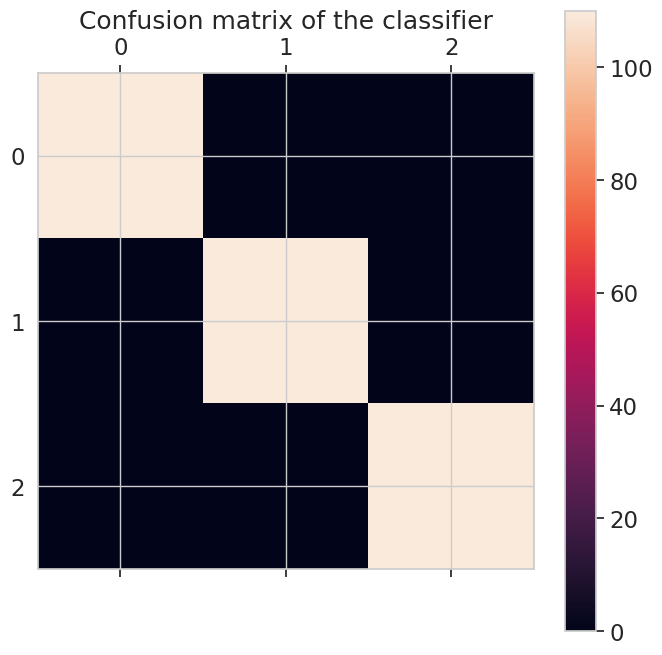

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

Coding di atas menggambarkan hasil matriks dari dataset yang sudah diperbaiki dan dihilangkan missing valuenya.

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       110

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



Codingan tersebut merupakan perintah untuk menampilkan laporan klasifikasi yang berisi berbagai metrik evaluasi kinerja model klasifikasi. Laporan klasifikasi menampilkan berbagai metrik evaluasi kinerja model klasifikasi, antara lain precision, recall, f1-score, dan support. 